In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
import sklearn.datasets as datasets
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('NumPy: {}'.format(np.__version__))

np.random.seed(42)


Python: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
Scikit-learn: 1.4.0
NumPy: 1.26.3


# Short simulation

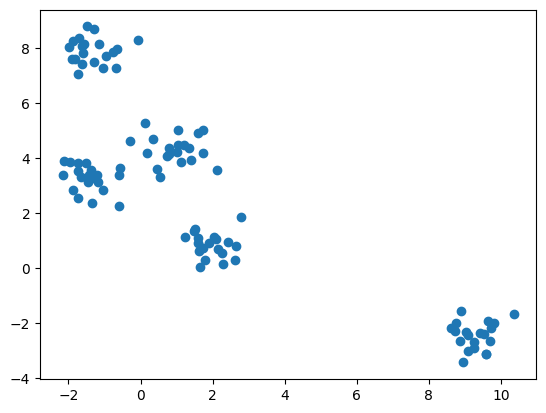

In [2]:
# Generate random data
X, Y = datasets.make_blobs(centers=5, cluster_std=0.5, random_state=0)

# Observe the data that you will manipulate
plt.jet() 
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
#X

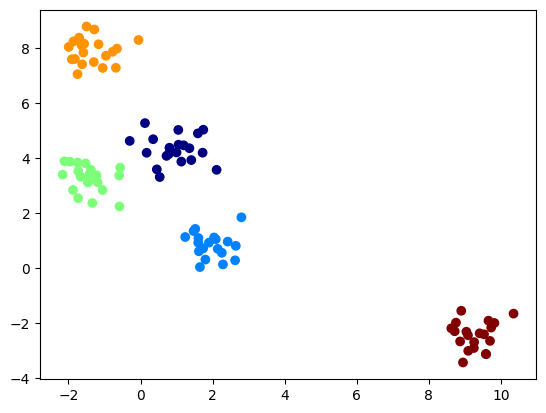

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

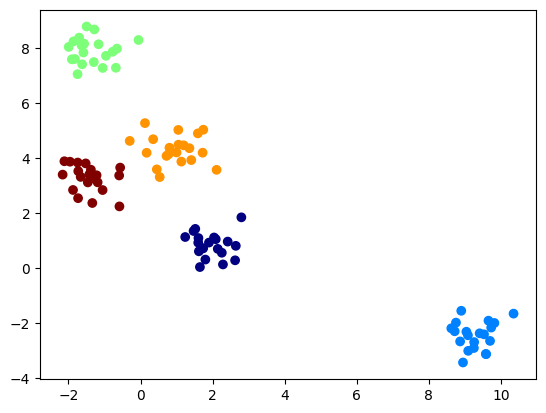

In [5]:
##**** Apply K-means clustering with k=4 then k=5 ***##
from sklearn.cluster import KMeans
kmeans = KMeans(5, random_state=0) 
Y_hat = kmeans.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat)
plt.show()

[[ 1.95870099  0.8332413 ]
 [ 9.29876892 -2.45311503]
 [-1.34316029  7.9094545 ]
 [ 0.94994195  4.32130875]
 [-1.43278801  3.27067413]]


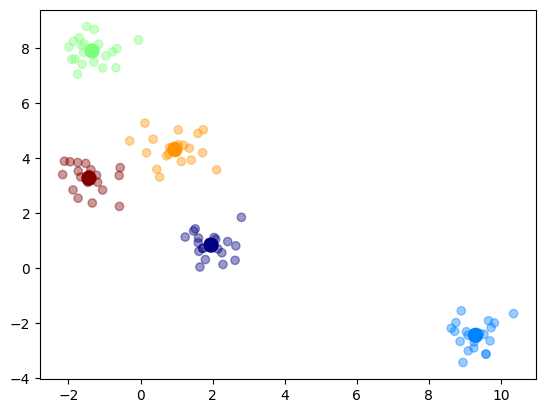

In [6]:
##**** On the figure above, plot the centroids of the resulting clusters ***##
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
print(mu)

# K-means Clustering on MNIST digit data

## 1. Visualise MNIST digit data

In [7]:
# Load 28*28 MNIST Images
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

##**** Take only 10000 instances to shorten runtime of KMeans ***##
X_digits = X_digits[0:10000]       
Y_digits = Y_digits[0:10000]
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))


##**** Print the number of classes, number of features, number of samples ***##
print (n_digits)
print ("n_features: %d" % n_features)
print ("n_samples: %d" % n_samples)
X_dataframe = pd.DataFrame(X_digits)

10
n_features: 784
n_samples: 10000


In [1]:
#for i in X_dataframe.columns:
    #print(X_dataframe[i].value_counts())

In [9]:
X_digits

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y_digits

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
##**** Visualize the values of Y-digits
print(Y_digits)
##**** Thus, explain to what refer X_digits and Y_digits ***##

##**** Print the number of samples per class ***##
X_digits=np.array(X_digits)
Y_digits=np.array(Y_digits)
Y_int=Y_digits.astype(int)
print("n_samples per group: %s" % np.bincount(Y_int))

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
n_samples per group: [1001 1127  991 1032  980  863 1014 1070  944  978]


Class: 3


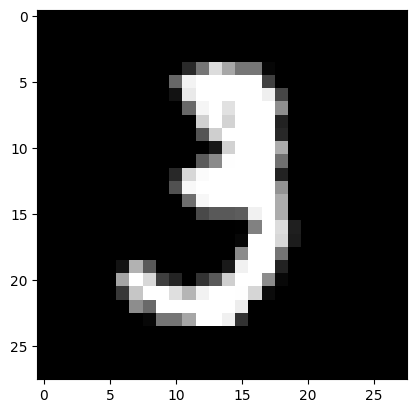

In [12]:
##**** Show an exemple of MNIST data ***##
p=10
plt.imshow(X_digits[p].reshape((28,28)), cmap='gray')
print("Class: %s" % Y_digits[p])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


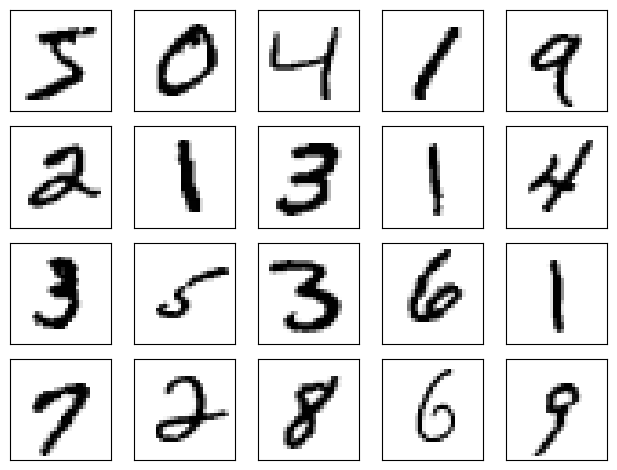

In [13]:
##**** Display twenty images, simultaneously, in grey-scale level and their associated label ***##

plt.rc("image", cmap="binary") 
print(Y_digits[:20])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

## 2. Apply K-Means

******** KMEANS completed ********
Calinski-Harabasz Index: 403.95289252542307
Davies-Bouldin Index: 2.8145829939317344


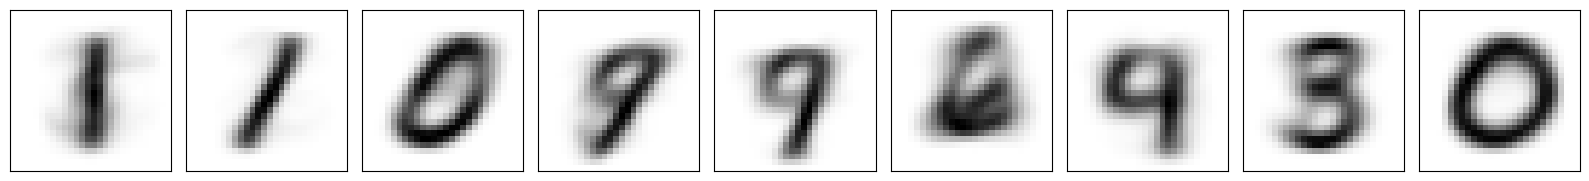

In [14]:
##**** Apply K-means with K=5 ***##
from sklearn.cluster import KMeans
from sklearn import metrics
n_clusters=9
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
model=kmeans.fit(X_digits)

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

# Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(X_digits, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz_score}")

# Davies-Bouldin Index
davies_bouldin_score = metrics.davies_bouldin_score(X_digits, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_score}")


##**** Visualize the centroids ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

##**** Analyze finely the obtained centroids ***##

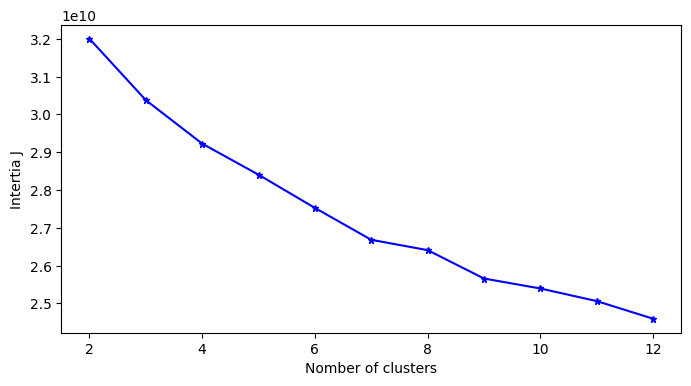

In [15]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 13) ***##
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,13)
    for k in K_range:
        model=KMeans(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) 

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Intertia J')
    plt.show()
    
plot_inertia(X_digits)   

##**** What do you observe ? ***## Pas de coude, on effectue une autre metrique => methode de la silouhete

## 3. Find the best number K of clusters

For k = 2 , Average Silhouette Score : 0.0908
For k = 3 , Average Silhouette Score : 0.0583
For k = 4 , Average Silhouette Score : 0.0638
For k = 5 , Average Silhouette Score : 0.0721
For k = 6 , Average Silhouette Score : 0.0694
For k = 7 , Average Silhouette Score : 0.0528
For k = 8 , Average Silhouette Score : 0.055
For k = 9 , Average Silhouette Score : 0.0566
For k = 10 , Average Silhouette Score : 0.0556
For k = 11 , Average Silhouette Score : 0.0627
For k = 12 , Average Silhouette Score : 0.0635


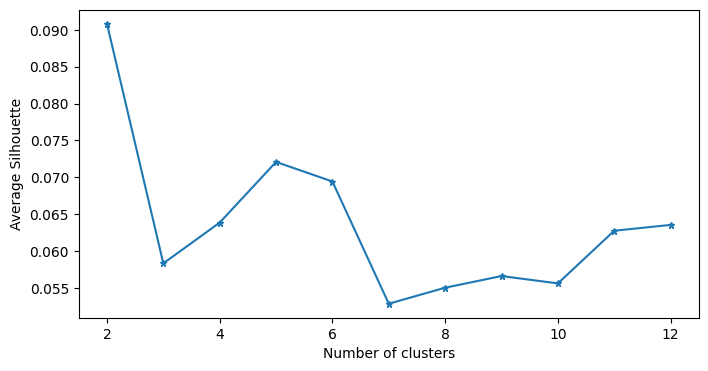

In [16]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X_digits):
    silhouette=[]
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMeans(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.show()

plot_silhouette(X_digits)

##**** Analyze the obtained curve and what do you conclude on the best value of K ***## gde valeur a 2 c'est normal, c'est un choc, prendre 9

## 4. Evaluate the quality of the clustering based on the original labels using different tools

In [17]:
print(clusters)
Y_int

[7 2 6 ... 5 4 3]


array([5, 0, 4, ..., 6, 9, 7])

In [18]:
##**** Tool 1 : Use confusion matrix reporting the distribution of the images of a given class (lines) in each cluster (column) ***##
conf_matrix=sklearn.metrics.confusion_matrix(Y_int,clusters)
print(conf_matrix)

##**** Analyze the results and accordingly conclude on the quality of the clustering  ***##
##**** Perfom a clustering with the best value of K. Analyze the quality of the clustering ***##

[[  6   0 411   4   1  17  10  36 516   0]
 [539 576   0   5   2   0   1   4   0   0]
 [108  78  18  31   4 633  20  95   4   0]
 [108   6  66  49  14  16  20 748   5   0]
 [ 43  19   0 247 241  24 406   0   0   0]
 [198   5 122 137  38  13  49 286  15   0]
 [150   5  22   0   0 783  29  13  12   0]
 [ 47  35   1 348 512   1 126   0   0   0]
 [108  40  30 291  18  21  26 405   5   0]
 [ 28   4   1 249 382   2 289  16   7   0]]


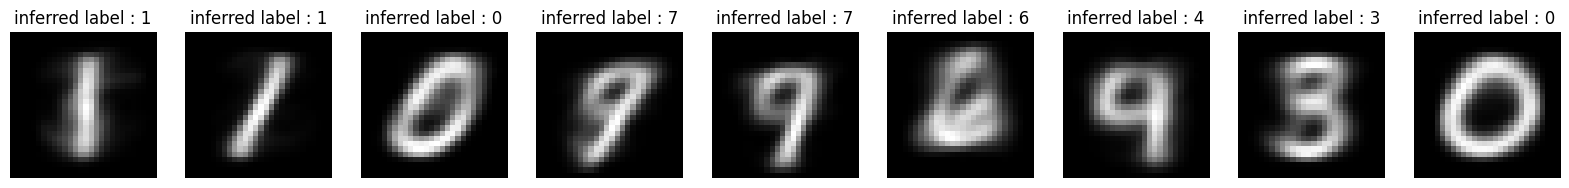

In [19]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))          
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()

##**** Analyze the inferred labels with the best value of K. Conclude ***##

In [20]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3))

Entropies= [7.19668657 6.64378973 6.50876914 7.215975   7.10002717 7.31986493
 6.88346259 7.37963215 6.33505425]
Average Entropy = 6.954


Cluster  8  presents the lowest entropy value = 6.335054251498059


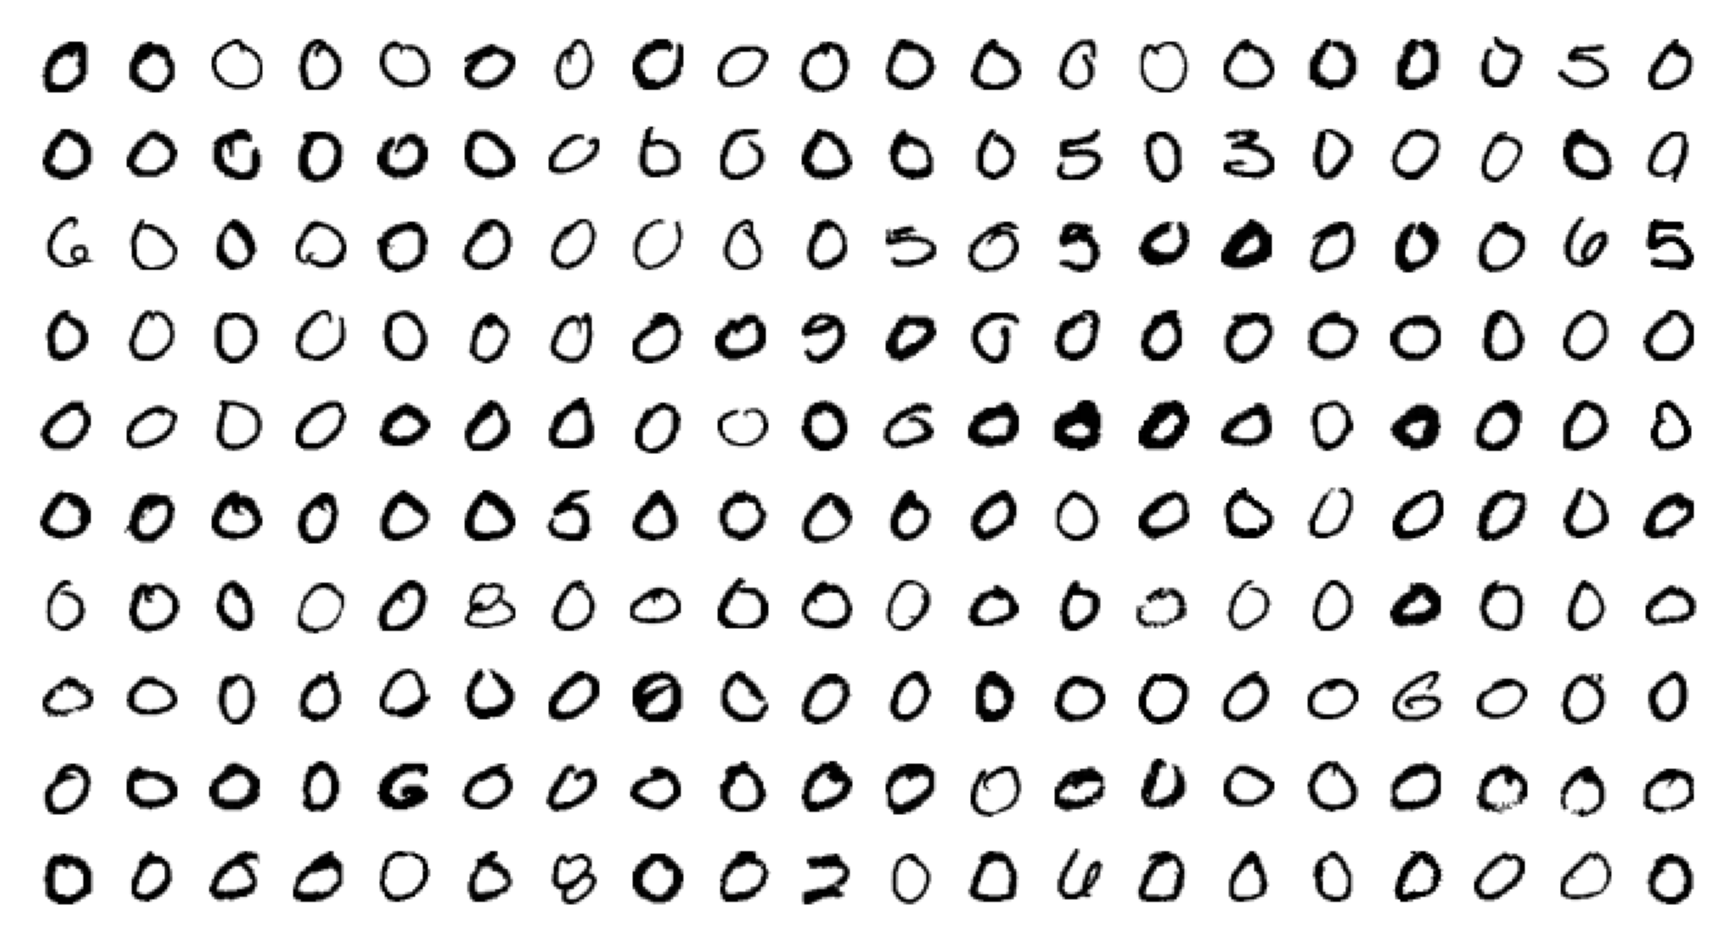

In [21]:
indmin = np.argmin(entropie)

print("Cluster ", indmin," presents the lowest entropy value =",entropie[indmin])
imc = X_digits[clusters==indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

Cluster  7  presents the highest entropy value = 7.3796321526095525


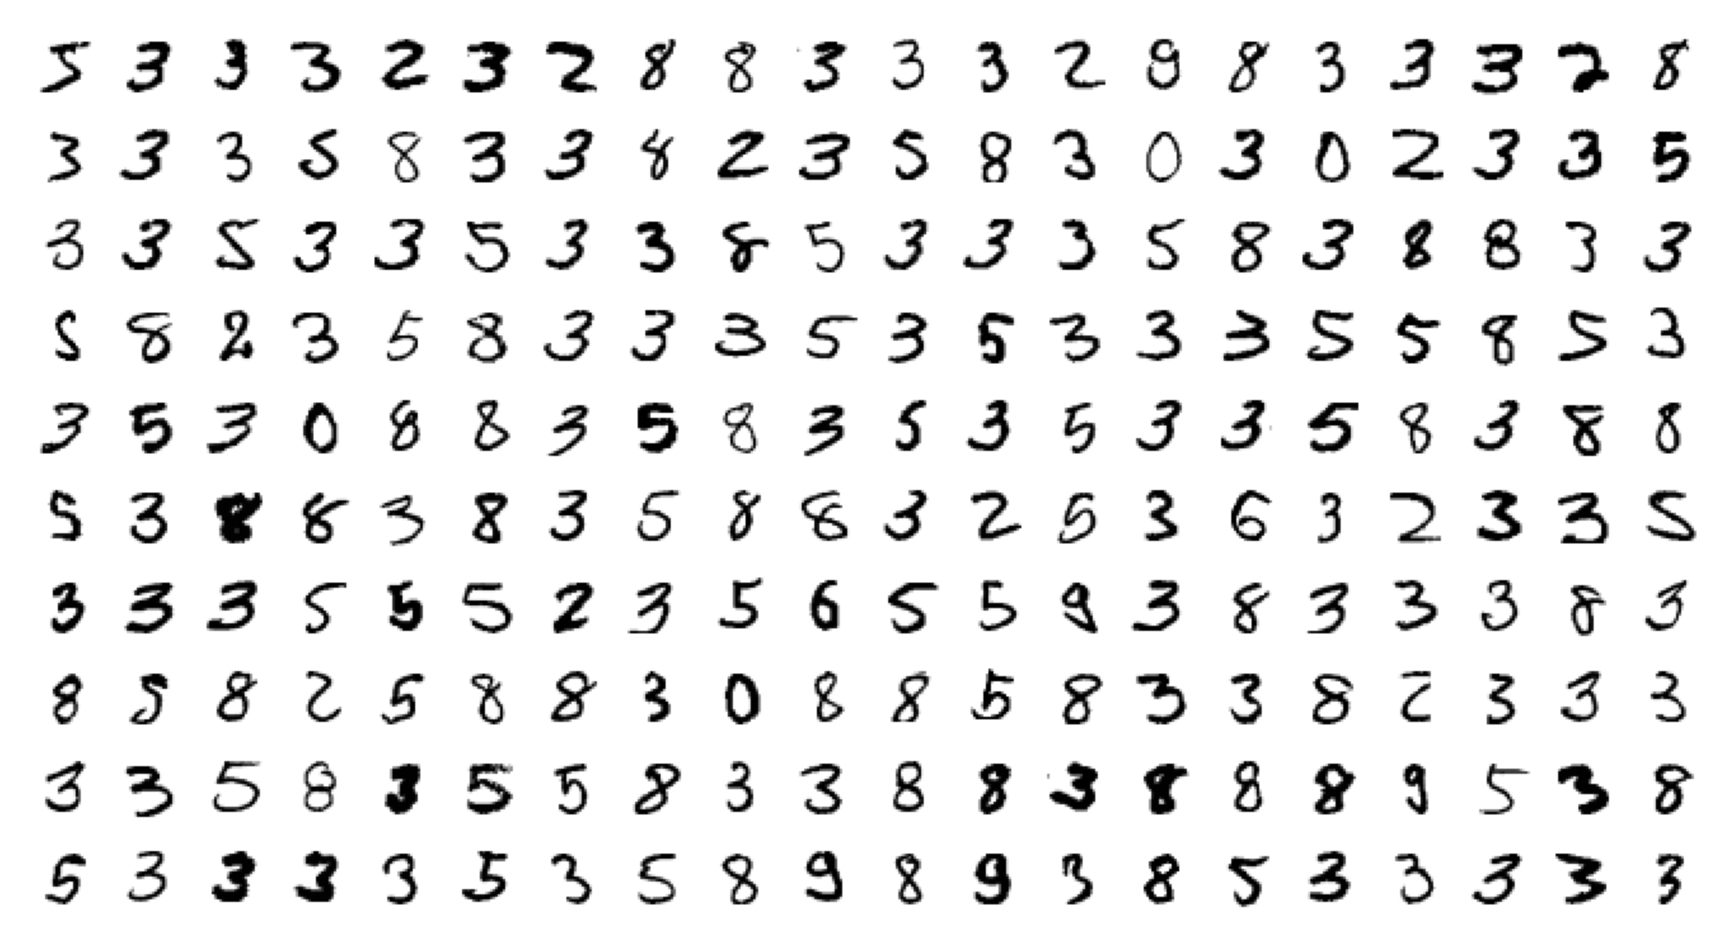

In [22]:
indmax = np.argmax(entropie)

print("Cluster ", indmax," presents the highest entropy value =",entropie[indmax])
imc = X_digits[clusters==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

In [23]:
# Test different number of clusters
clu=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clust in clu:
    estimator = KMeans(n_clusters = n_clust, init="k-means++",n_init=4)
    estimator.fit(X_digits)
     
    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # Compute and display the percentage of total good classification 
    acc=metrics.accuracy_score(Y_int, predicted_Y)
    acc=acc*100
    print("For k =", n_clust, ', Good distribution of : {}%\n'.format(round(acc,2)))

For k = 2 , Good distribution of : 20.93%

For k = 3 , Good distribution of : 30.04%

For k = 4 , Good distribution of : 37.92%

For k = 5 , Good distribution of : 45.54%

For k = 6 , Good distribution of : 47.53%

For k = 7 , Good distribution of : 46.76%

For k = 8 , Good distribution of : 51.6%

For k = 9 , Good distribution of : 52.49%

For k = 10 , Good distribution of : 56.74%

For k = 11 , Good distribution of : 58.24%

For k = 12 , Good distribution of : 59.68%

For k = 13 , Good distribution of : 62.7%

For k = 14 , Good distribution of : 66.9%

For k = 15 , Good distribution of : 64.8%



# K-medoïd Clustering on MNIST Digit

******** KMEDOIDS completed ********


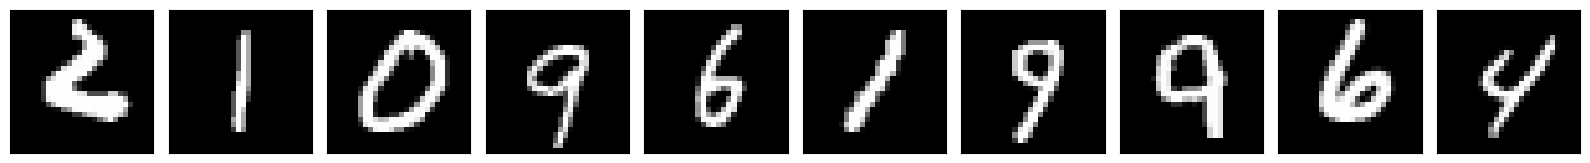

In [24]:
from sklearn_extra.cluster import KMedoids

n_clusters=10
kmedoids = KMedoids(n_clusters=n_clusters, init="k-medoids++")
model=kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

##**** Visualize the centroids ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()


##**** Analyze finely the obtained centroids ***##

# TO COMPLETE for clustering MNIST DIGIT

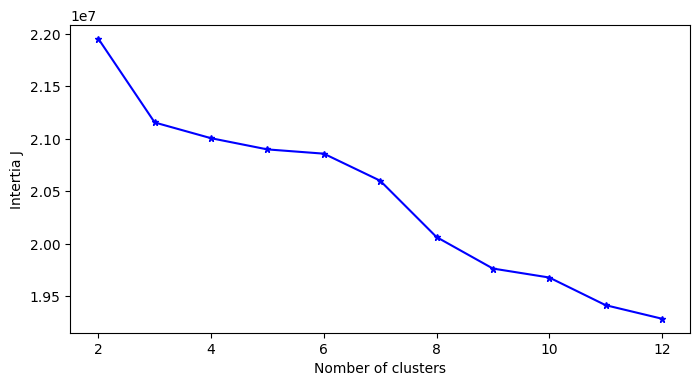

In [25]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 13) ***##
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,13)
    for k in K_range:
        model=KMedoids(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) 

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Intertia J')
    plt.show()
    
plot_inertia(X_digits)   


For k = 2 , Average Silhouette Score : 0.026
For k = 3 , Average Silhouette Score : 0.0318
For k = 4 , Average Silhouette Score : 0.0284
For k = 5 , Average Silhouette Score : 0.0275
For k = 6 , Average Silhouette Score : 0.0192
For k = 7 , Average Silhouette Score : 0.0276
For k = 8 , Average Silhouette Score : 0.0323
For k = 9 , Average Silhouette Score : 0.0256
For k = 10 , Average Silhouette Score : 0.0261
For k = 11 , Average Silhouette Score : 0.0331
For k = 12 , Average Silhouette Score : 0.0298


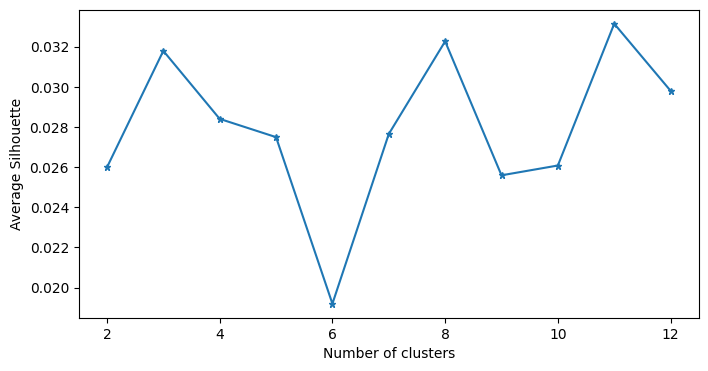

In [26]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X_digits):
    silhouette=[]
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMedoids(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.show()

plot_silhouette(X_digits)


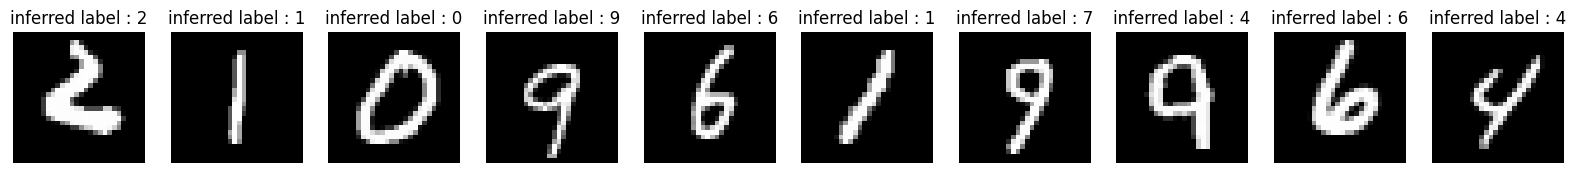

In [27]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))          
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()

##**** Analyze the inferred labels with the best value of K. Conclude ***## images réelles de l'ensemble

In [28]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3)) #6.833 pour kmeans

Entropies= [4.33073334 7.35372233 6.92362863 7.22037384 6.89770494 7.1180162
 7.27447956 6.55108034 6.51619308 6.84161548]
Average Entropy = 6.703


Cluster  0  presents the lowest entropy value = 4.330733340286331


IndexError: index 76 is out of bounds for axis 0 with size 76

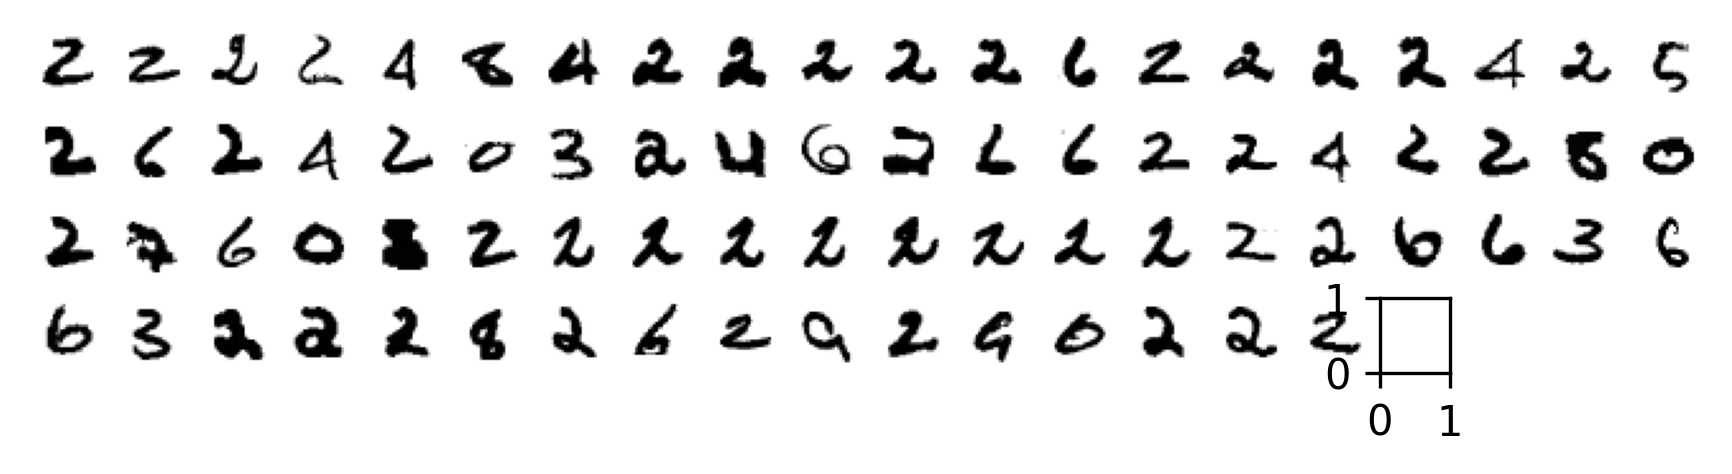

In [29]:
indmin = np.argmin(entropie)

print("Cluster ", indmin," presents the lowest entropy value =",entropie[indmin])
imc = X_digits[clusters==indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

In [ ]:
indmax = np.argmax(entropie)

print("Cluster ", indmax," presents the highest entropy value =",entropie[indmax])
imc = X_digits[clusters==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')


In [ ]:
# Test different number of clusters
clu=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clust in clu:
    estimator = KMedoids(n_clusters = n_clust, init="k-medoids++")
    estimator.fit(X_digits)
     
    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # Compute and display the percentage of total good classification 
    acc=metrics.accuracy_score(Y_int, predicted_Y)
    acc=acc*100
    print("For k =", n_clust, ', Good distribution of : {}%\n'.format(round(acc,2)))

In [ ]:
#kmedoids, representant est une donnée existante pas une moyenne comme le kmean
# itératiuon plus grande sur toute les données e chaque groupe, on teste si une donnée pour chque donnée du cluster diminue l'entropie
#methode du coude plus facile a appliquer ici, les representant sont des données existantes, 
# l'entropie globale est plus élevée que pour kmean mais les valeur maximale sont plus importante : ~6 pour kmean, ~5 pour kmedoids pour min

In [ ]:
# kmeans prend en compte la distributin des données
# pour gmm aussi

# Gaussian Mixture Model for Clustering 


In [ ]:
# la fonction de cout du gmm est la log vraissemblance

In [ ]:
# Load 28*28 MNIST Images
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

##**** Take only 10000 instances to shorten runtime of KMeans ***##
X_digits = X_digits[0:10000]       
Y_digits = Y_digits[0:10000]
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))


##**** Print the number of classes, number of features, number of samples ***##
print (n_digits)
print ("n_features: %d" % n_features)
print ("n_samples: %d" % n_samples)
X_dataframe = pd.DataFrame(X_digits)

In [ ]:
X_digits

In [ ]:
for i in X_digits.columns:
    print(X_digits[i].value_counts())

In [ ]:
from sklearn.mixture import GaussianMixture
#x, _ = datasets.make_blobs(n_samples=330, centers=5, cluster_std=1.84)
#X, Y = datasets.make_blobs(centers=5, cluster_std=0.5, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_digits[:,0], X_digits[:,1])
plt.show() 

In [ ]:
X_digits.value_counts()

In [ ]:
gm = GaussianMixture(n_components=9).fit(X_digits)
gm.get_params() 
#initialisé avec un kmean k = 5

In [ ]:
centers = gm.means_
print(centers)
  

In [ ]:
plt.figure(figsize=(8, 6))
#plt.scatter(X_digits[:,0], X_digits[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

In [ ]:
from pandas import DataFrame 
pred = gm.predict(x)

df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show() 

In [ ]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
 gm = GaussianMixture(n_components=i).fit(x)
 pred = gm.predict(x)
 df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
 groups = df.groupby('label')
 f.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()        
plt.show()  

# Limitation of K-Means

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='plasma');


In [ ]:
# To complete by the application of K-means and DBSCAN methods on such data

# K-Means for Compression / Segmentation

In [ ]:
from skimage import io

In [ ]:
##**** Read the image 1 ***##
OrigImage = io.imread('dog.jpg')
io.imshow(OrigImage);
print('Shape of the Image : ', OrigImage.shape)


In [ ]:
##**** Reshape the image : convert the image into a vector BUT here each element of the vector is in 3D (RGB) ***##
rows, cols = OrigImage.shape[0], OrigImage.shape[1]
image = OrigImage.reshape(rows * cols, 3)
print(image.shape)
print(image[:4])

In [ ]:
##**** Apply K-Means on the image with K=5, K=10 and K=16 ***##
kMeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
model=kMeans.fit(image)

##**** Observe examples of Centeroids in RGB domain (3D) ***##
centers = np.asarray(model.cluster_centers_, dtype = np.uint8)
#centers

In [ ]:
# labels 
labels = np.asarray(model.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
#labels

In [ ]:
##**** Reconstruction of the image based on the segmentation obtained with K-means ***##
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # Assignment of every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
#io.imsave('dog-compressed.png', newImage);
io.imshow(newImage);
newImage.shape

In [ ]:
##**** Display the original and the compressed images side-by-side for a better comparion ***##
##**** Compare with different values of k clusters ***##

fig, ax = plt.subplots(1, 2, figsize=(20, 10),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(OrigImage)
ax[0].set_title('Original Image', size=10)
ax[1].imshow(newImage)
ax[1].set_title('Compressed Image', size=10);